In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#Statistics
# Statistics
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from scipy.interpolate import interp1d

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from dateutil.parser import parse 
import pickle

# READ CSV AND DESCRIPTION OF SERIES


In [3]:
#FEES
fees = pd.read_csv("data/bitcoin-total-transaction-fees-btc.csv")

fees["Fees (Total)/t"] = fees["Fees (Total)/t"].str.rstrip("T00:00:00.000Z")
fees["Fees (Total)/t"] = pd.to_datetime(fees["Fees (Total)/t"])
fees = fees.sort_values(by='Fees (Total)/t')
fees = fees.rename(columns={'Fees (Total)/t': 'Timestamp', 'Fees (Total)/v': 'Value'})

#Description
print(fees.head())
print("\nShape is:", fees.shape)
print("\nSummary of the dataset:")
fees.describe()
print("\nAre there null values?")
fees.isna().sum()

    Timestamp  Value
7  2009-01-01    0.0
17 2009-01-02    0.0
0  2009-01-03    0.0
27 2009-01-03    0.0
1  2009-01-04    0.0

Shape is: (4988, 2)

Summary of the dataset:

Are there null values?


Timestamp    0
Value        0
dtype: int64

# VISUALIZATION

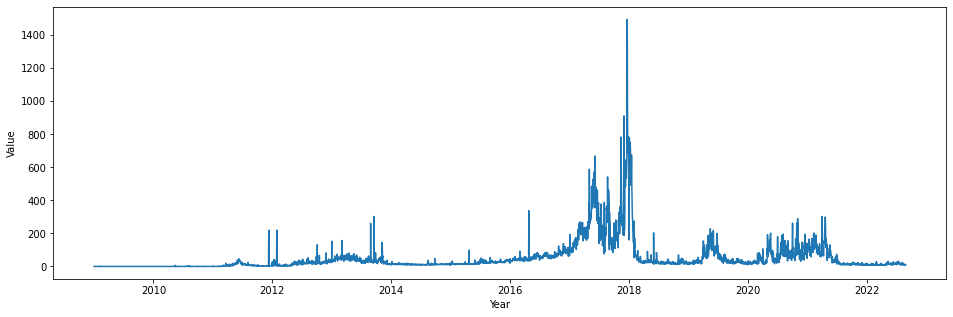

In [4]:
plt.figure(figsize=(16,5))
plt.plot(fees["Timestamp"], fees["Value"])
plt.gca().set(xlabel="Year", ylabel="Value")
#scommentare riga giù per visualizzare in scala log
#plt.yscale('log') 
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


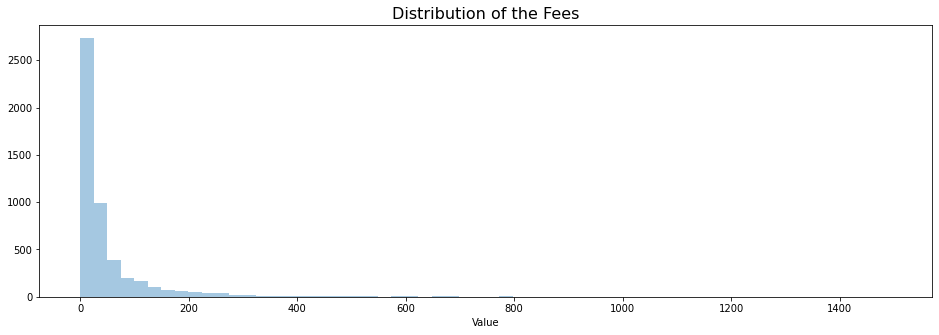

In [5]:
plt.figure(figsize=(16,5))
sns.distplot(fees["Value"], kde = False, bins = 60)
plt.title('Distribution of the Fees', fontsize=16)
plt.show()